In [2]:
pip install yfinance pandas numpy scikit-learn matplotlib

  Using cached yfinance-0.2.33-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-4.9.4-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.7 kB)
  Using cached frozendict-2.3.10-py3-none-any.whl.metadata (20 kB)
  Using cached peewee-3.17.0-cp311-cp311-linux_x86_64.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached yfinance-0.2.33-py2.py3-none-any.whl (69 kB)
Using cached frozendict-2.3.10-py3-none-any.whl (14 kB)
Using cached lxml-4.9.4-cp311-cp311-manylinux_2_28_x86_64.whl (7.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd

# Download historical data for AAPL
ticker_symbol = "AAPL"
aapl_data = yf.download(ticker_symbol, start="2010-01-01", end="2023-12-31")
# Save the DataFrame to a CSV file in data folder
aapl_data.to_csv('data/AAPL_stock_data.csv')

ModuleNotFoundError: No module named 'yfinance'

In [110]:
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769102,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557426,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096231,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001547,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044609,458707200


In [111]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2766 entries, 2013-01-02 to 2023-12-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2766 non-null   float64
 1   High       2766 non-null   float64
 2   Low        2766 non-null   float64
 3   Close      2766 non-null   float64
 4   Adj Close  2766 non-null   float64
 5   Volume     2766 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.3 KB


In [112]:
# Check for missing values
aapl_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [113]:
# Fill missing values if any
aapl_data.fillna(method='ffill', inplace=True)  # Forward fill


/tmp/ipykernel_2253/4264294166.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data.fillna(method='ffill', inplace=True)  # Forward fill


In [114]:
# Example: Calculate a 5-day moving average
aapl_data['5_day_avg'] = aapl_data['Close'].rolling(window=5).mean()
# Fill NaN values with the first non-NaN average or another value
aapl_data['5_day_avg'].fillna(method='bfill', inplace=True)  # Backward fill
# or
aapl_data['5_day_avg'].fillna(aapl_data['Close'], inplace=True)  # Fill with the closing price


/tmp/ipykernel_2253/923900812.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data['5_day_avg'].fillna(method='bfill', inplace=True)  # Backward fill


In [115]:
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume,5_day_avg
Date,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769102,560518000,19.052428
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557426,352965200,19.052428
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096231,594333600,19.052428
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001547,484156400,19.052428
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044609,458707200,19.052428


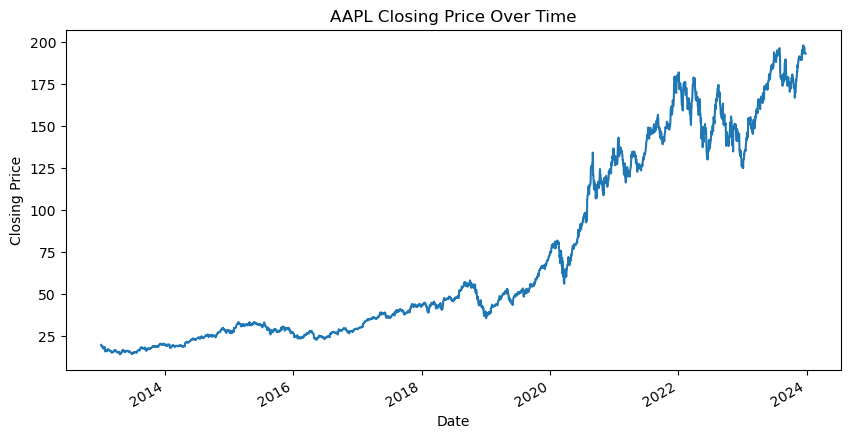

In [148]:
# Time series visualization
import matplotlib.pyplot as plt

aapl_data['Close'].plot(figsize=(10, 5))
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


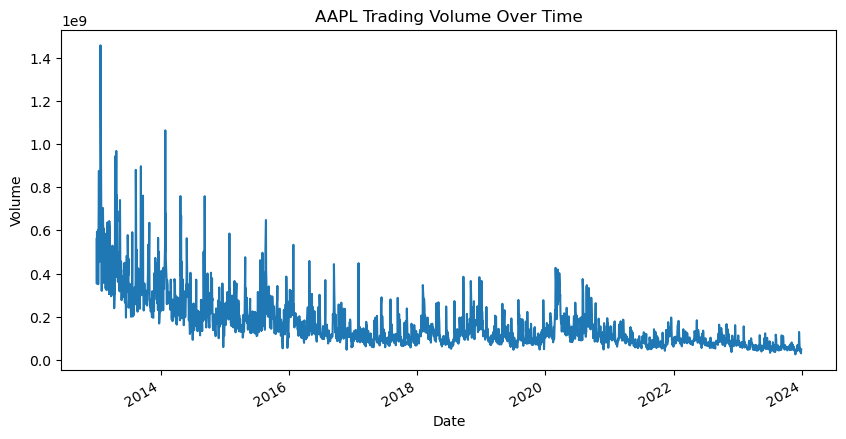

In [150]:
# Volume Analysis
aapl_data['Volume'].plot(figsize=(10, 5))
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [152]:
# Check for Stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(aapl_data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 0.470191
p-value: 0.983938


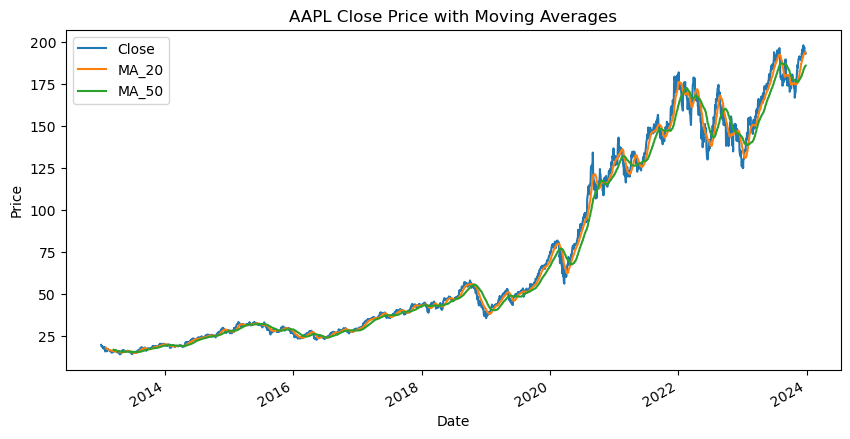

In [153]:
# Moving Average
aapl_data['MA_20'] = aapl_data['Close'].rolling(window=20).mean()
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()

aapl_data[['Close', 'MA_20', 'MA_50']].plot(figsize=(10, 5))
plt.title('AAPL Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [154]:
correlation = aapl_data.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume,5_day_avg,MA_20,MA_50
Open,1.000000,0.999886,0.999862,0.999715,0.999681,-0.500007,0.999661,0.997840,0.994062
High,0.999886,1.000000,0.999831,0.999863,0.999822,-0.498317,0.999665,0.997924,0.994304
Low,0.999862,0.999831,1.000000,0.999869,0.999846,-0.502300,0.999568,0.997567,0.993736
Close,0.999715,0.999863,0.999869,1.000000,0.999966,-0.500505,0.999520,0.997612,0.993933
Adj Close,0.999681,0.999822,0.999846,0.999966,1.000000,-0.500782,0.999505,0.997658,0.994100
Volume,-0.500007,-0.498317,-0.502300,-0.500505,-0.500782,1.000000,-0.499180,-0.509491,-0.503884
5_day_avg,0.999661,0.999665,0.999568,0.999520,0.999505,-0.499180,1.000000,0.998549,0.994909
MA_20,0.997840,0.997924,0.997567,0.997612,0.997658,-0.509491,0.998549,1.000000,0.997709
MA_50,0.994062,0.994304,0.993736,0.993933,0.994100,-0.503884,0.994909,0.997709,1.000000


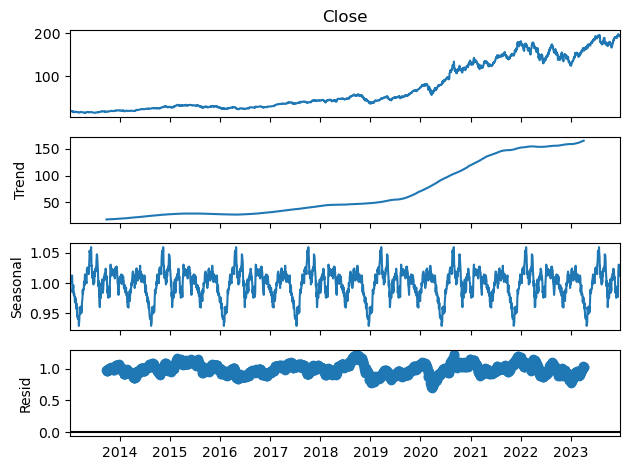

In [155]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(aapl_data['Close'], model='multiplicative', period=365)
result.plot()
plt.show()


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare features and target
X = aapl_data[['Open', 'High', 'Low', '5_day_avg']]
y = aapl_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict and evaluate
predictions = model.predict(X_test)
mse_lr = mean_squared_error(y_test, predictions)
mae_lr = mean_absolute_error(y_test, predictions)
mse_lr, mae_lr

(0.3779292776484768, 0.3626084228142111)

In [119]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [120]:
# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse, rf_mae

(0.7540778670706267, 0.521238388206124)

In [46]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [121]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

In [122]:
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aapl_data)

In [123]:
# Create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]   
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [124]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1) # Reshape for LSTM

In [125]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
# Create LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [127]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[MeanSquaredError(), MeanAbsoluteError()])
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
34/34 [==============================] - 28s 478ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - mean_absolute_error: 0.1042 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0296
Epoch 2/100
34/34 [==============================] - 13s 381ms/step - loss: 8.3167e-04 - mean_squared_error: 8.3167e-04 - mean_absolute_error: 0.0195 - val_loss: 6.2565e-04 - val_mean_squared_error: 6.2565e-04 - val_mean_absolute_error: 0.0158
Epoch 3/100
34/34 [==============================] - 14s 408ms/step - loss: 5.7342e-04 - mean_squared_error: 5.7342e-04 - mean_absolute_error: 0.0158 - val_loss: 5.9290e-04 - val_mean_squared_error: 5.9290e-04 - val_mean_absolute_error: 0.0160
Epoch 4/100
34/34 [==============================] - 14s 399ms/step - loss: 5.4961e-04 - mean_squared_error: 5.4961e-04 - mean_absolute_error: 0.0153 - val_loss: 6.4709e-04 - val_mean_squared_error: 6.4709e-04 - val_mean_absolute_error: 0.0168
Epoch 5/100
34/34 [=====================

In [128]:
# Predict and evaluate (you may need to inverse transform to get actual values)
lstm_predictions = lstm_model.predict(X_test)

17/17 [==============================] - 5s 142ms/step


In [129]:
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
# Calculate MSE and MAE
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_mse, lstm_mae

(0.0001321017965459706, 0.007148323070932663)

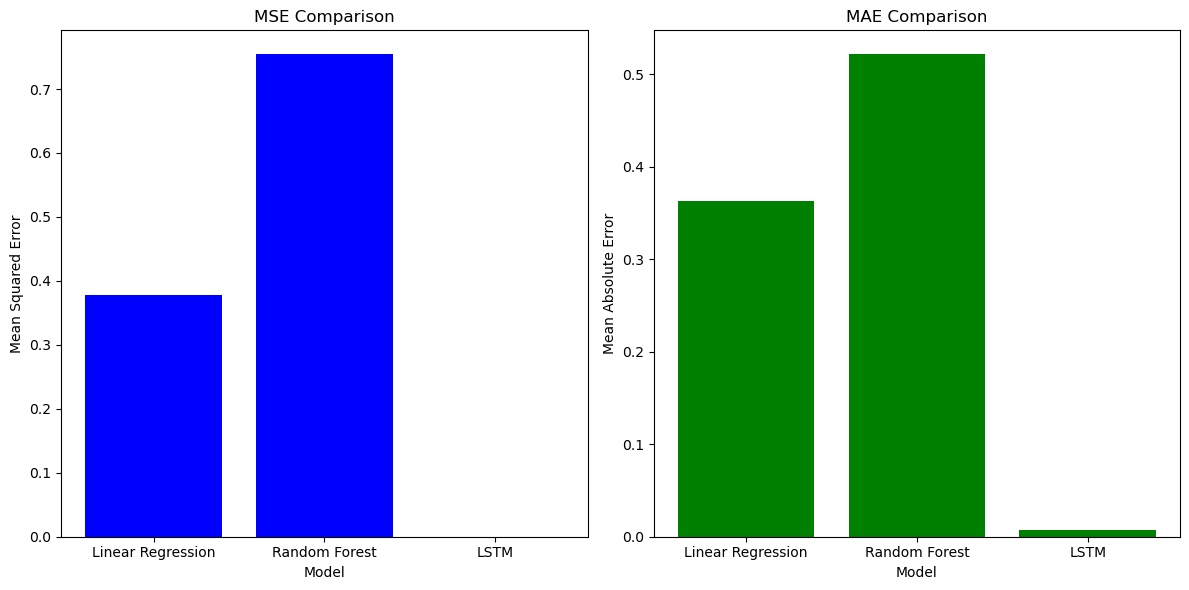

In [130]:
import matplotlib.pyplot as plt

# Assuming you have these values from your models' evaluations
mse_values = {
    'Linear Regression': mse_lr,  # Replace with your actual MSE value
    'Random Forest': rf_mse,          # Replace with your actual MSE value
    'LSTM': lstm_mse                  # Replace with your actual MSE value
}

mae_values = {
    'Linear Regression': mae_lr,  # Replace with your actual MAE value
    'Random Forest': rf_mae,          # Replace with your actual MAE value
    'LSTM': lstm_mae                  # Replace with your actual MAE value
}

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# MSE Comparison
ax[0].bar(mse_values.keys(), mse_values.values(), color='blue')
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xlabel('Model')

# MAE Comparison
ax[1].bar(mae_values.keys(), mae_values.values(), color='green')
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_xlabel('Model')

plt.tight_layout()
plt.show()

In [131]:
# This will create inputs X and targets y
X, y = create_dataset(scaled_data)

# Reshape the input data to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [132]:

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [133]:
# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
87/87 [==============================] - 21s 17ms/step - loss: 0.0806
Epoch 2/100
87/87 [==============================] - 1s 17ms/step - loss: 0.0039
Epoch 3/100
87/87 [==============================] - 1s 17ms/step - loss: 3.9031e-04
Epoch 4/100
87/87 [==============================] - 2s 17ms/step - loss: 3.4144e-04
Epoch 5/100
87/87 [==============================] - 2s 17ms/step - loss: 2.9760e-04
Epoch 6/100
87/87 [==============================] - 1s 17ms/step - loss: 2.5920e-04
Epoch 7/100
87/87 [==============================] - 1s 16ms/step - loss: 2.1230e-04
Epoch 8/100
87/87 [==============================] - 1s 16ms/step - loss: 1.8094e-04
Epoch 9/100
87/87 [==============================] - 2s 20ms/step - loss: 1.4940e-04
Epoch 10/100
87/87 [==============================] - 2s 22ms/step - loss: 1.2734e-04
Epoch 11/100
87/87 [==============================] - 2s 21ms/step - loss: 1.1110e-04
Epoch 12/100
87/87 [==============================] - 2s 18ms/step - l

In [135]:
# Save the model
model.save('lstm_model.h5')

# Save the scaler
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.save']

In [136]:
# Inverse scaling (if your data was scaled)
y_pred = model.predict(X)

87/87 [==============================] - 3s 7ms/step


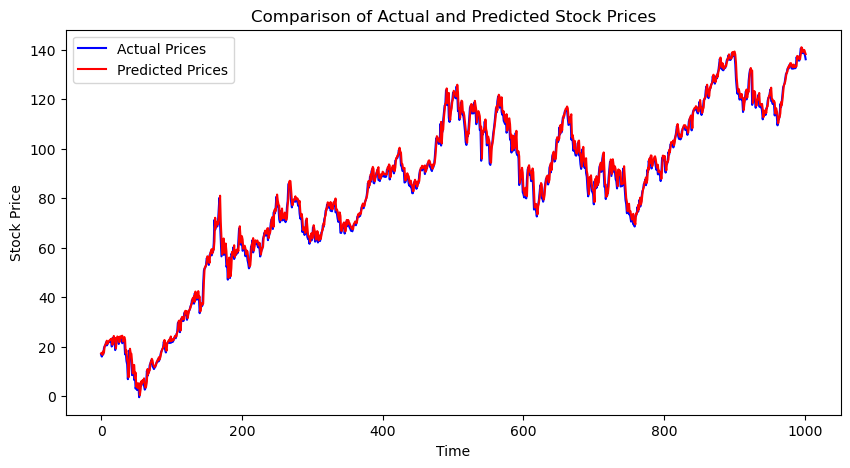

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(actual_prices_flattened, label='Actual Prices', color='blue')
plt.plot(predicted_prices_flattened, label='Predicted Prices', color='red')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [91]:
y_pred

array([[0.1258278 ],
       [0.1274364 ],
       [0.12149785],
       ...,
       [0.9954521 ],
       [0.9898792 ],
       [0.9834674 ]], dtype=float32)

In [138]:
min_val = scaler.min_[0]
scale_val = scaler.scale_[0]
original_min_val = scaler.data_min_[0]
original_max_val = scaler.data_max_[0]


actual_prices = y / scale_val + min_val
predicted_prices = y_pred / scale_val + min_val

actual_prices_flattened = actual_prices.flatten() if actual_prices.ndim > 1 else actual_prices
predicted_prices_flattened = predicted_prices.flatten() if predicted_prices.ndim > 1 else predicted_prices


In [139]:
import pandas as pd
AAPL_predictions = {
    'Actual Price': actual_prices_flattened,
    'Predicted Price': predicted_prices_flattened
}
df = pd.DataFrame(AAPL_predictions)


In [140]:
df.head()

,Actual Price,Predicted Price
0,5.635833,6.877306
1,5.246191,6.664490
2,4.711547,6.273639
3,4.969047,5.737402
4,4.729404,5.995660


In [141]:
csv_filename = 'stock_prices_predictions.csv'
df.to_csv(csv_filename, index=False)

print(f"Data exported to {csv_filename}")

Data exported to stock_prices_predictions.csv
